<a href="https://colab.research.google.com/github/gh10gh/a/blob/main/A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

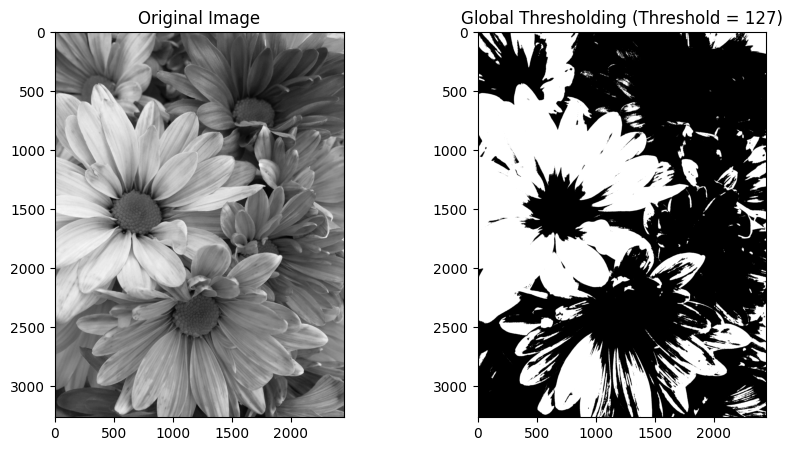

In [7]:
# Assignment 1: Pixel Classification &amp; Grey Level Thresholding
# ● Write a Python function that classifies pixels in a grayscale image
# into two classes based on a given threshold.
# ● Implement global thresholding using a fixed threshold.

import numpy as np
import matplotlib.pyplot as plt

def global_thresholding(image_path, threshold):
    # Load the image using matplotlib
    img = plt.imread(image_path)

    # Convert to grayscale if necessary
    if img.ndim == 3:  # If the image is RGB, convert to grayscale
        img = np.mean(img, axis=2).astype(np.uint8)

    # Apply global thresholding using NumPy
    binary_img = np.where(img > threshold, 255, 0).astype(np.uint8)

    # Display the results using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f"Global Thresholding (Threshold = {threshold})")
    plt.imshow(binary_img, cmap='gray')
    plt.show()

# Example usage
image_path = 'example.jpg'  # Replace with the actual path to your image
global_thresholding(image_path, 127)

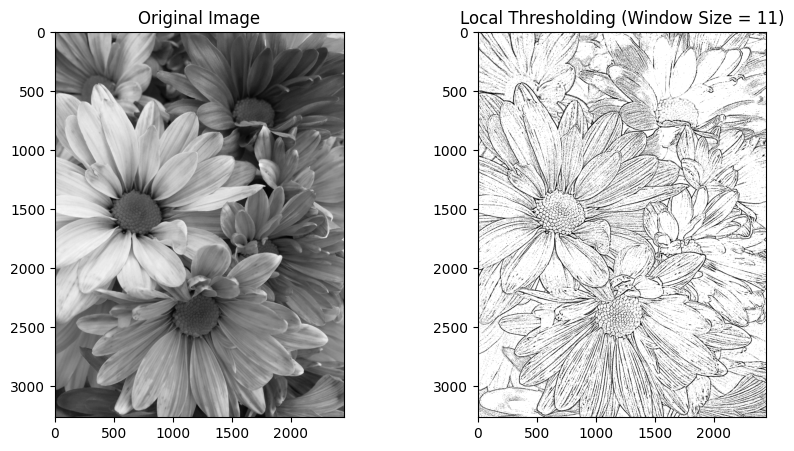

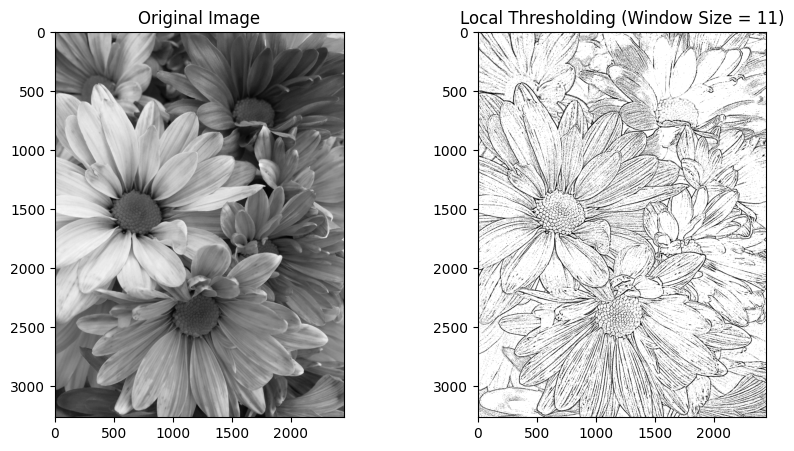

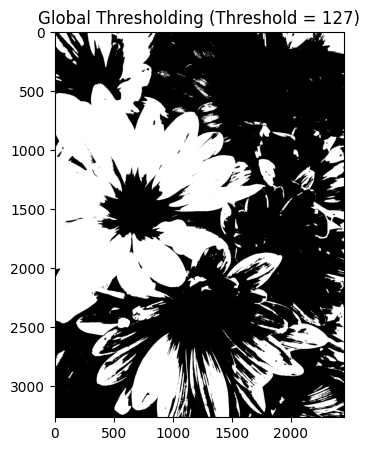

In [8]:
# ● Implement local thresholding using a window-based approach.
# ● Compare the results of global and local thresholding.

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter

def local_thresholding(image_path, window_size, C=0):
    """Applies local thresholding using a window-based approach."""
    img = plt.imread(image_path)

    # Convert to grayscale if necessary
    if img.ndim == 3:  # If the image is RGB, convert to grayscale
        img = np.mean(img, axis=2).astype(np.uint8)

    # Calculate local mean using uniform filter
    local_mean = uniform_filter(img, size=window_size)

    # Apply local thresholding
    binary_img = np.where(img > local_mean - C, 255, 0).astype(np.uint8)

    # Display results
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title(f"Local Thresholding (Window Size = {window_size})")
    plt.imshow(binary_img, cmap='gray')
    plt.show()

def compare_thresholding(image_path, global_thresh, local_window_size, C=0):
    """Compares global and local thresholding results."""
    img = plt.imread(image_path)

    # Convert to grayscale if necessary
    if img.ndim == 3:  # If the image is RGB, convert to grayscale
        img = np.mean(img, axis=2).astype(np.uint8)

    # Global thresholding
    global_binary_img = np.where(img > global_thresh, 255, 0).astype(np.uint8)

    # Local thresholding (using local_thresholding function)
    local_binary_img = local_thresholding(image_path, local_window_size, C)
    # Note: Adjust display if needed (local_thresholding already displays)

    # ... (Display global_binary_img if you want to compare visually) ...
    # ... You can use plt.imshow() for this ...
    plt.figure(figsize=(10, 5))
    plt.imshow(global_binary_img, cmap='gray')
    plt.title(f"Global Thresholding (Threshold = {global_thresh})")

    plt.show()

# Example usage
image_path = 'example.jpg'
local_thresholding(image_path, window_size=11, C=2)
compare_thresholding(image_path, global_thresh=127, local_window_size=11, C=2)

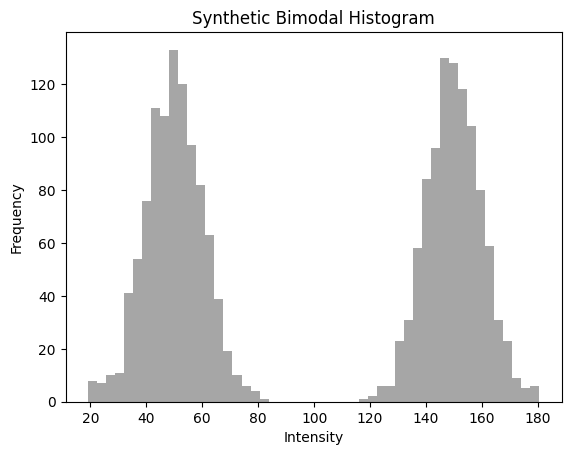

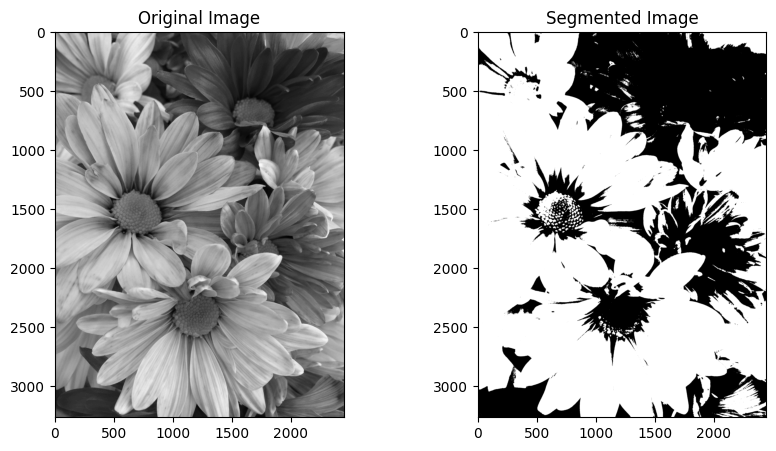

In [4]:
# Assignment 2: Optimum Thresholding - Bayes Analysis
# ● Generate a synthetic bimodal histogram representing two classes.
# ● Implement Bayes thresholding based on the histogram.
# ● Apply the threshold to segment the image.

import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_bimodal_histogram():
    class1 = np.random.normal(loc=50, scale=10, size=1000)
    class2 = np.random.normal(loc=150, scale=10, size=1000)
    bimodal_data = np.concatenate([class1, class2])
    plt.hist(bimodal_data, bins=50, color='gray', alpha=0.7)
    plt.title("Synthetic Bimodal Histogram")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.show()
    return bimodal_data

def bayes_thresholding(data):
    hist, bin_edges = np.histogram(data, bins=256, density=True)
    total_pixels = np.sum(hist)
    max_variance = 0
    optimal_threshold = 0
    for t in range(1, len(hist)):
        # Probabilities and means for two classes
        prob1 = np.sum(hist[:t]) / total_pixels
        prob2 = np.sum(hist[t:]) / total_pixels
        mean1 = np.sum(bin_edges[:-1][:t] * hist[:t]) / np.sum(hist[:t]) if prob1 > 0 else 0
        mean2 = np.sum(bin_edges[:-1][t:] * hist[t:]) / np.sum(hist[t:]) if prob2 > 0 else 0
        # Between-class variance
        variance = prob1 * prob2 * (mean1 - mean2)**2
        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t
    return optimal_threshold

# Generate bimodal data and find threshold
bimodal_data = generate_bimodal_histogram()
threshold = bayes_thresholding(bimodal_data)

# Apply threshold to segment the image
image_path = 'example.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if img is None:
    print(f"Error: Could not read image at {image_path}")
else:
    _, segmented_img = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Segmented Image")
    plt.imshow(segmented_img, cmap='gray')
    plt.show()

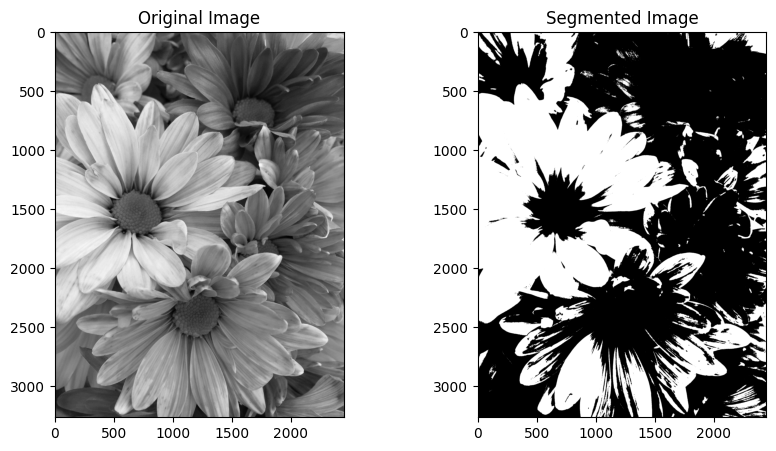

In [6]:
# Assignment 3: Otsu Method
# ● Implement the Otsu method to find the optimal threshold.
# ● Apply the threshold to segment the image.
# ● Visualize the results.

import numpy as np
import matplotlib.pyplot as plt

def otsu_thresholding(image):
    hist, bin_edges = np.histogram(image.ravel(), bins=256, range=(0, 256))
    total_pixels = image.size

    optimal_threshold = 0
    max_variance = 0

    for t in range(1, 256):
        # Probabilities and means for two classes
        prob1 = np.sum(hist[:t]) / total_pixels
        prob2 = np.sum(hist[t:]) / total_pixels

        mean1 = np.sum(bin_edges[:-1][:t] * hist[:t]) / np.sum(hist[:t]) if prob1 > 0 else 0
        mean2 = np.sum(bin_edges[:-1][t:] * hist[t:]) / np.sum(hist[t:]) if prob2 > 0 else 0

        # Between-class variance
        variance = prob1 * prob2 * (mean1 - mean2) ** 2

        if variance > max_variance:
            max_variance = variance
            optimal_threshold = t

    return optimal_threshold

# Load the image using matplotlib (replace 'example.jpg' with your image path)
image = plt.imread('example.jpg')
if image.ndim == 3:  # If the image is RGB, convert to grayscale
    image = np.mean(image, axis=2).astype(np.uint8)

# Apply Otsu's thresholding
threshold = otsu_thresholding(image)

# Segment the image
segmented_image = np.where(image > threshold, 255, 0).astype(np.uint8)

# Display the results using matplotlib
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image, cmap='gray')
plt.show()